In [138]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [139]:
data = pd.read_csv("C:\\Users\\nbakodiya\\Downloads\\8b9aafccf7da11ee\\dataset\\train.csv")

In [11]:
data.head()

,candidate_id,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area,triglyceride_lvl
0,CAN_1,Male,35,170,165.35,1.0,1.0,Slightly Defective,Slightly Defective,120.0,...,126.0,17.1,1.0,1.0,21.0,35.0,Does not Smoke,Y,Town,92.0
1,CAN_2,Male,30,180,176.37,0.9,1.2,Slightly Defective,Slightly Defective,130.0,...,148.0,15.8,1.0,0.9,20.0,36.0,Chain Smoker,N,Urban,121.0
2,CAN_3,Male,40,165,165.35,1.2,1.5,Slightly Defective,Slightly Defective,120.0,...,74.0,15.8,1.0,0.9,47.0,32.0,Does not Smoke,N,Rural,104.0
3,CAN_4,Male,50,175,176.37,1.5,1.2,Slightly Defective,Slightly Defective,145.0,...,104.0,17.6,1.0,1.1,29.0,34.0,Does not Smoke,N,Town,106.0
4,CAN_5,Male,50,165,132.28,1.0,1.2,Slightly Defective,Slightly Defective,138.0,...,117.0,13.8,1.0,0.8,19.0,12.0,Does not Smoke,N,Urban,104.0


In [12]:
data.tail()

,candidate_id,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area,triglyceride_lvl
22395,CAN_22396,Female,50,175,110.23,0.8,1.0,Slightly Defective,Slightly Defective,100.0,...,164.0,14.7,1.0,0.6,26.0,21.0,Does not Smoke,Y,Town,52.0
22396,CAN_22397,Male,30,165,165.35,0.5,1.0,Slightly Defective,Slightly Defective,135.0,...,181.0,16.4,1.0,0.8,36.0,81.0,Chain Smoker,Y,Town,195.0
22397,CAN_22398,Female,65,150,132.28,0.8,0.8,Slightly Defective,Slightly Defective,153.0,...,180.0,13.6,1.0,0.6,22.0,14.0,Does not Smoke,N,Town,328.0
22398,CAN_22399,Male,50,170,121.25,1.0,1.0,Slightly Defective,Slightly Defective,113.0,...,189.0,16.1,1.0,0.9,23.0,12.0,Chain Smoker,N,Town,97.0
22399,CAN_22400,Male,45,170,165.35,1.2,1.5,Slightly Defective,Slightly Defective,150.0,...,105.0,15.2,1.0,0.8,26.0,26.0,Does not Smoke,Y,Town,139.0


In [23]:
data.isnull().sum()

candidate_id              0
gender                    0
age                       0
height_in_cm              0
weight_in_lbs             0
left_eyesight_lvl         0
right_eyesight_lvl        0
can_hear_left_ear         0
can_hear_right_ear        0
blood_pressure_lvl1       0
blood_pressure_lvl2       0
glucose_lvl               0
total_cholestrol          0
good_cholestrol_lvl       0
bad_cholestrol_lvl        0
hemoglobin_lvl            0
urea_lvl                  0
creatinine_lvl            0
liver_enzyme_lvl1         0
liver_enzyme_lvl2      1550
smoking_habit          1511
drinking_habit         1492
residential_area          0
triglyceride_lvl          0
dtype: int64

In [20]:
data['gender'].value_counts(dropna=False)

Male      11954
Female    10446
Name: gender, dtype: int64

In [19]:
data['can_hear_left_ear'].value_counts(dropna=False)

Slightly Defective    21741
Highly Defective        659
Name: can_hear_left_ear, dtype: int64

In [18]:
data['smoking_habit'].value_counts(dropna=False)

Does not Smoke         12636
Chain Smoker            4568
Occassionaly Smokes     3685
NaN                     1511
Name: smoking_habit, dtype: int64

In [21]:
data['drinking_habit'].value_counts(dropna=False)

N      10471
Y      10437
NaN     1492
Name: drinking_habit, dtype: int64

In [22]:
data['residential_area'].value_counts(dropna=False)

Urban    7504
Town     7476
Rural    7420
Name: residential_area, dtype: int64

In [24]:
data['liver_enzyme_lvl2'].value_counts(dropna=False)

NaN      1550
16.0     1031
14.0     1017
17.0      964
15.0      955
         ... 
269.0       1
253.0       1
308.0       1
183.0       1
136.0       1
Name: liver_enzyme_lvl2, Length: 197, dtype: int64

In [27]:
# Function to check if a column is continuous or discrete
def check_continuous_or_discrete(column):
    if pd.api.types.is_integer_dtype(column):
        return 'Discrete'
    elif pd.api.types.is_float_dtype(column):
        unique_values = column.nunique()
        total_values = len(column)
        if unique_values / total_values < 0.05:  # Arbitrary threshold, adjust as needed
            return 'Discrete'
        else:
            return 'Continuous'
    else:
        return 'Unknown'

In [28]:
for column_name in data.columns:
    column_data = data[column_name]
    result = check_continuous_or_discrete(column_data)
    print(f"Column '{column_name}' is {result}.")

Column 'candidate_id' is Unknown.
Column 'gender' is Unknown.
Column 'age' is Discrete.
Column 'height_in_cm' is Discrete.
Column 'weight_in_lbs' is Discrete.
Column 'left_eyesight_lvl' is Discrete.
Column 'right_eyesight_lvl' is Discrete.
Column 'can_hear_left_ear' is Unknown.
Column 'can_hear_right_ear' is Unknown.
Column 'blood_pressure_lvl1' is Discrete.
Column 'blood_pressure_lvl2' is Discrete.
Column 'glucose_lvl' is Discrete.
Column 'total_cholestrol' is Discrete.
Column 'good_cholestrol_lvl' is Discrete.
Column 'bad_cholestrol_lvl' is Discrete.
Column 'hemoglobin_lvl' is Discrete.
Column 'urea_lvl' is Discrete.
Column 'creatinine_lvl' is Discrete.
Column 'liver_enzyme_lvl1' is Discrete.
Column 'liver_enzyme_lvl2' is Discrete.
Column 'smoking_habit' is Unknown.
Column 'drinking_habit' is Unknown.
Column 'residential_area' is Unknown.
Column 'triglyceride_lvl' is Discrete.


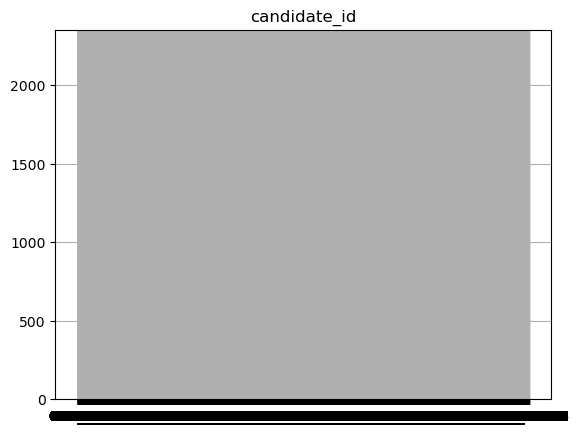

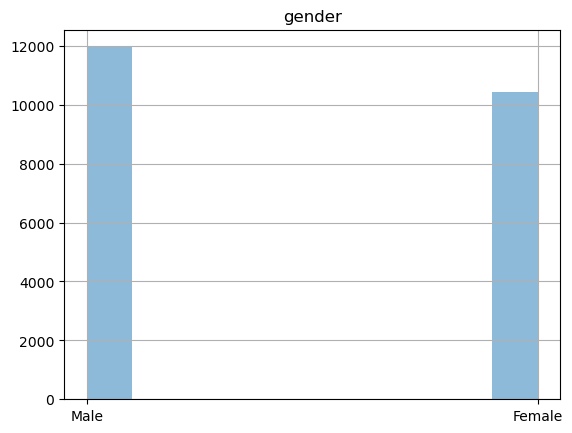

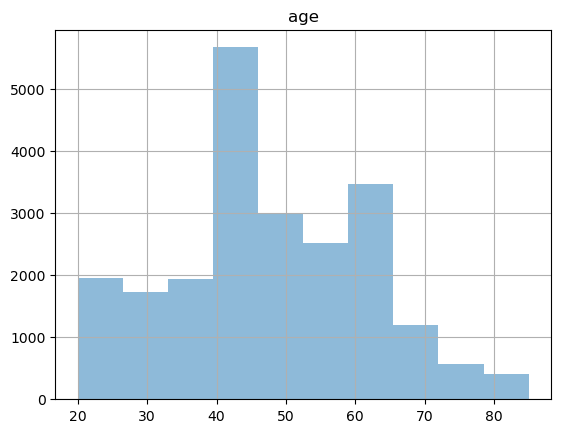

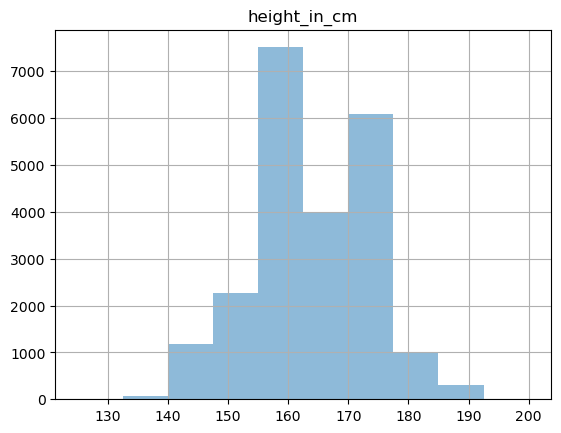

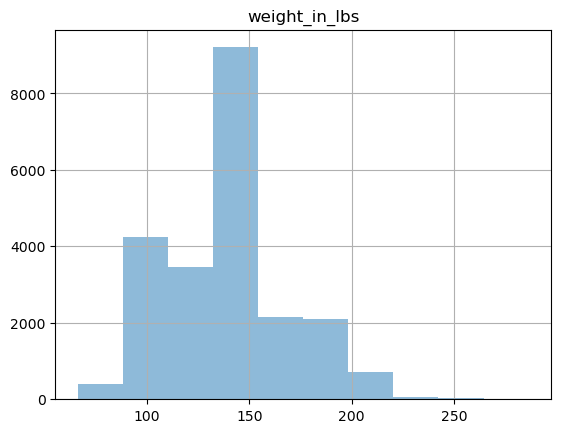

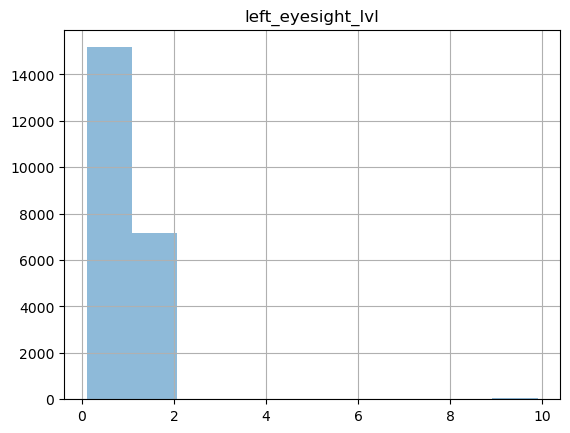

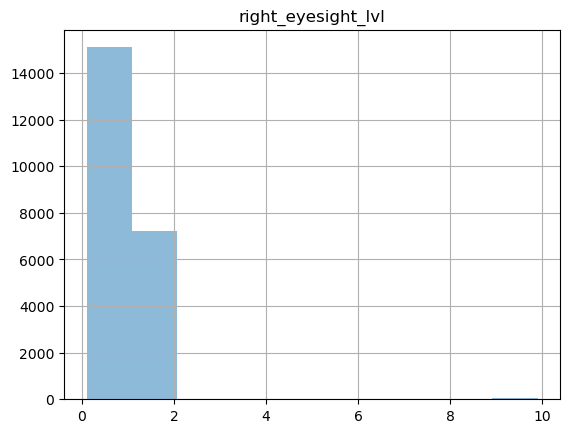

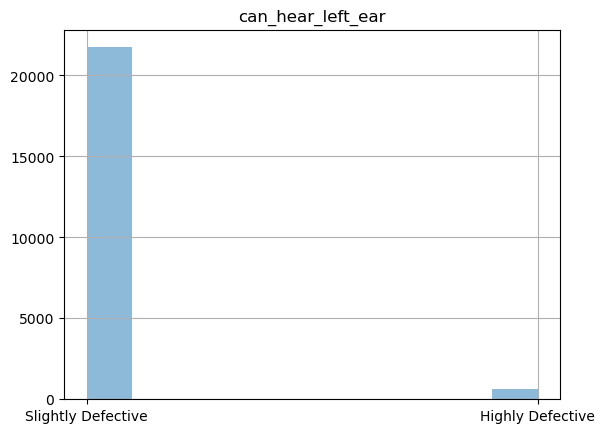

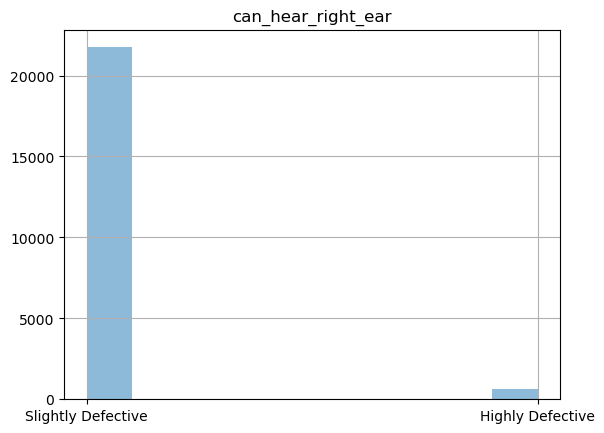

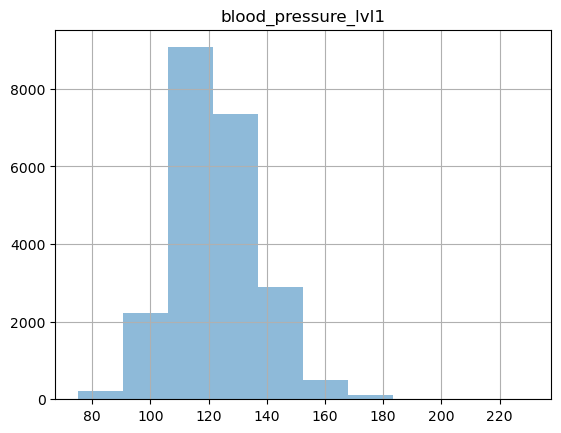

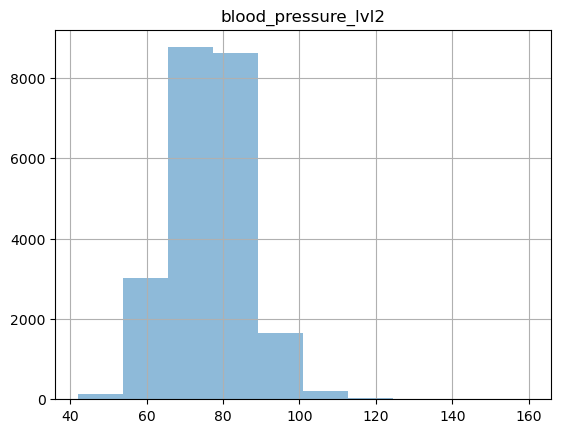

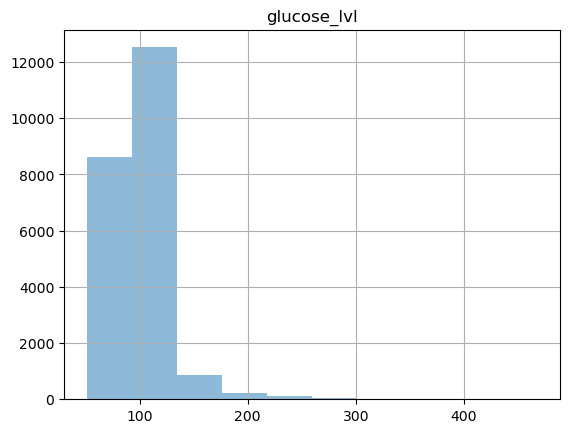

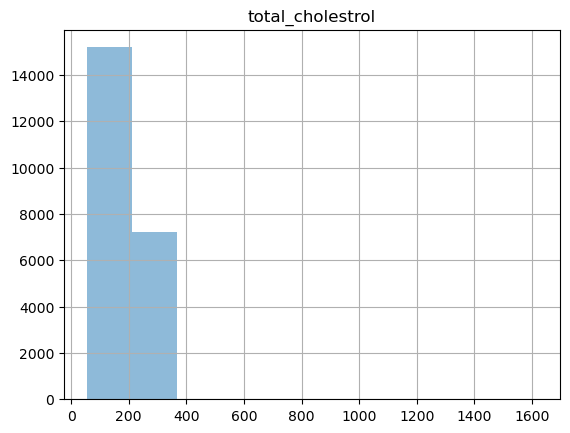

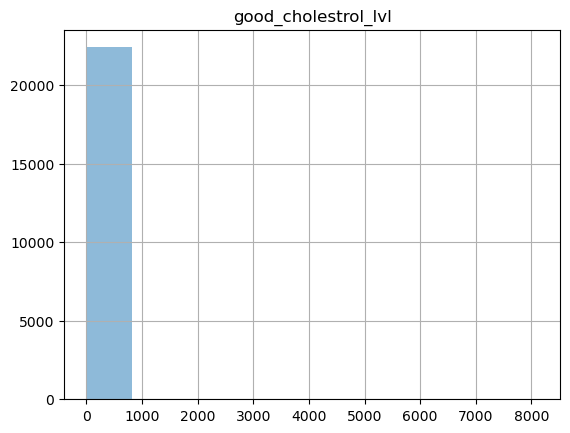

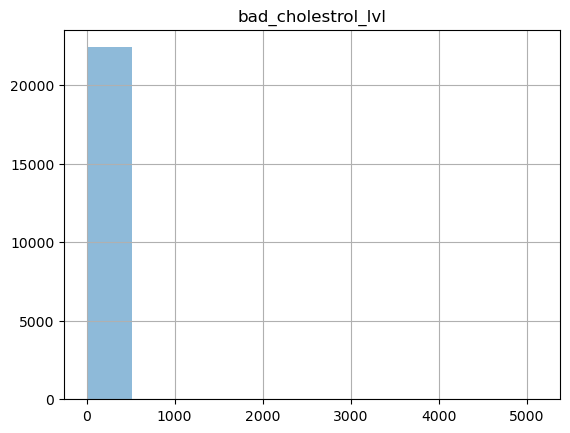

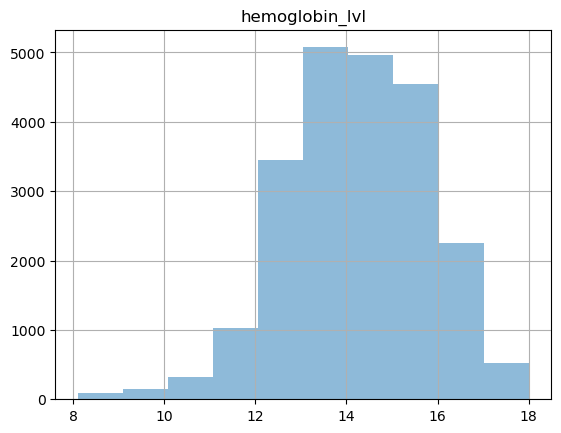

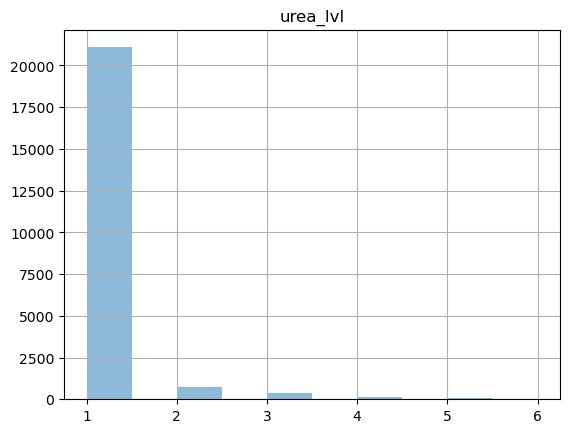

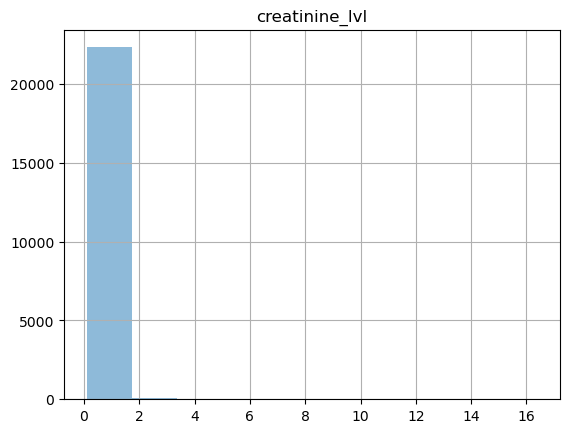

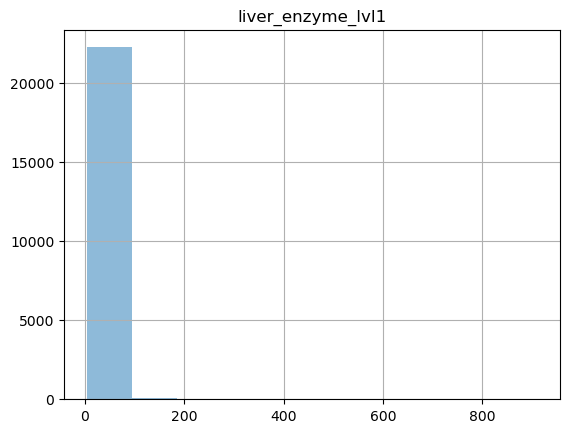

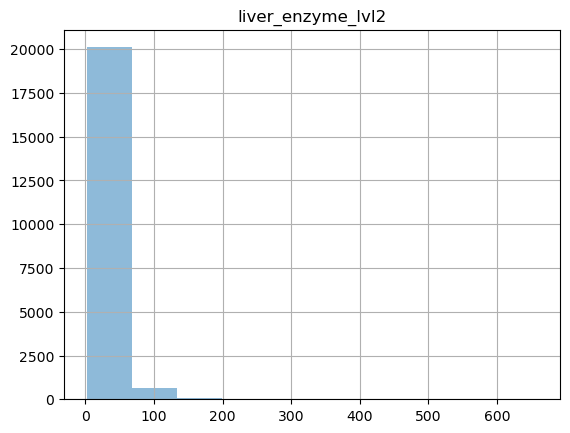

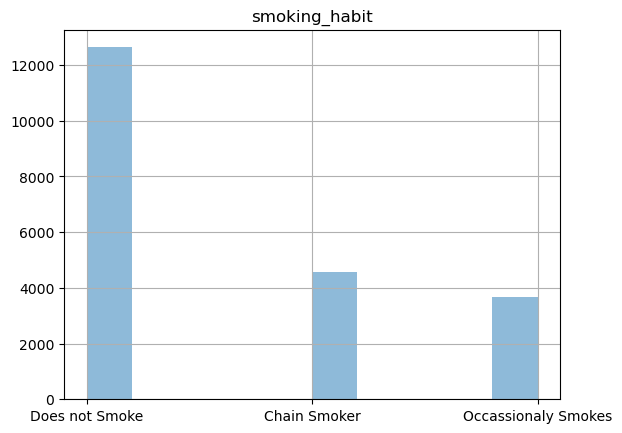

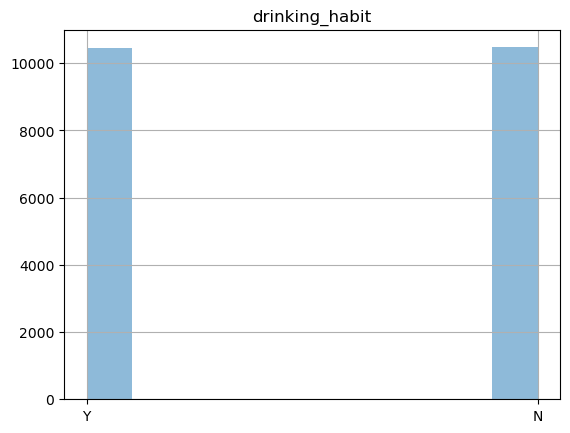

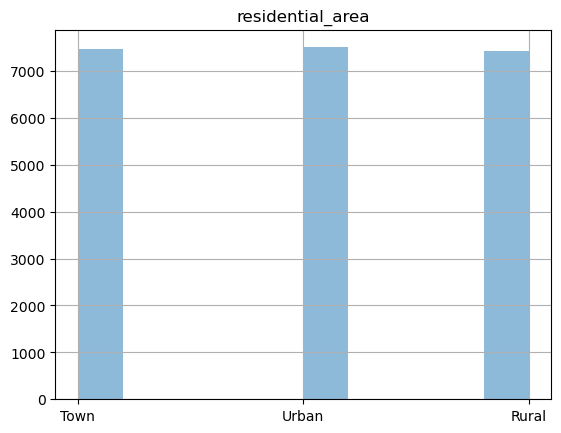

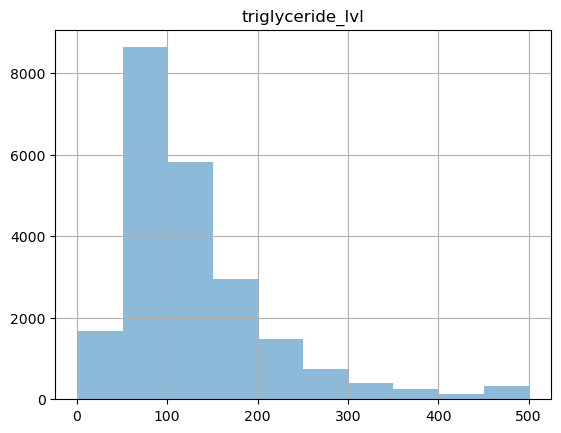

In [29]:
import matplotlib.pyplot as plt

# Plot histograms for each column
for column_name in data.columns:
    data[column_name].hist(bins=10, alpha=0.5)
    plt.title(column_name)
    plt.show()

In [30]:
# Summary statistics
print(data.describe())

                age  height_in_cm  weight_in_lbs  left_eyesight_lvl  \
count  22400.000000  22400.000000   22400.000000       22400.000000   
mean      47.586607    162.689286     139.644081           0.982098   
std       14.167025      9.710639      27.550786           0.613311   
min       20.000000    125.000000      66.140000           0.100000   
25%       35.000000    155.000000     121.250000           0.700000   
50%       45.000000    165.000000     132.280000           1.000000   
75%       60.000000    170.000000     154.320000           1.200000   
max       85.000000    200.000000     286.600000           9.900000   

       right_eyesight_lvl  blood_pressure_lvl1  blood_pressure_lvl2  \
count        22400.000000         22400.000000         22400.000000   
mean             0.978196           122.561473            76.120491   
std              0.590100            14.581722             9.921338   
min              0.100000            75.000000            42.000000   
25%  

C:\Users\nbakodiya\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


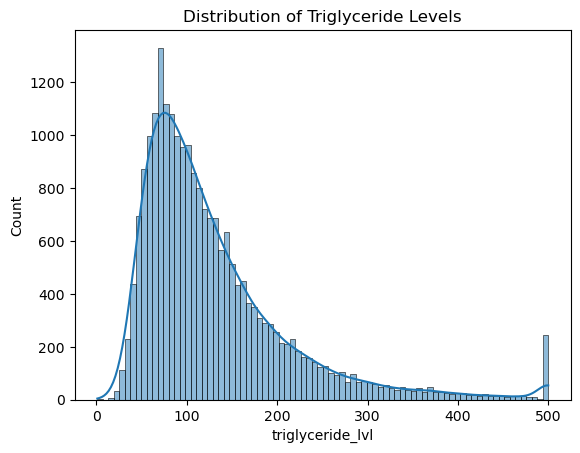

In [32]:
# Visualize the distribution of the target variable (triglyceride_lvl)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['triglyceride_lvl'], kde=True)
plt.title('Distribution of Triglyceride Levels')
plt.show()

In [140]:
# Handling missing values
data['liver_enzyme_lvl2'].fillna(data['liver_enzyme_lvl2'].median(), inplace=True)
data['smoking_habit'].fillna(data['smoking_habit'].mode()[0], inplace=True)
data['drinking_habit'].fillna(data['drinking_habit'].mode()[0], inplace=True)

In [141]:
print(data.isnull().sum())

candidate_id           0
gender                 0
age                    0
height_in_cm           0
weight_in_lbs          0
left_eyesight_lvl      0
right_eyesight_lvl     0
can_hear_left_ear      0
can_hear_right_ear     0
blood_pressure_lvl1    0
blood_pressure_lvl2    0
glucose_lvl            0
total_cholestrol       0
good_cholestrol_lvl    0
bad_cholestrol_lvl     0
hemoglobin_lvl         0
urea_lvl               0
creatinine_lvl         0
liver_enzyme_lvl1      0
liver_enzyme_lvl2      0
smoking_habit          0
drinking_habit         0
residential_area       0
triglyceride_lvl       0
dtype: int64


In [142]:
data.head()

,candidate_id,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area,triglyceride_lvl
0,CAN_1,Male,35,170,165.35,1.0,1.0,Slightly Defective,Slightly Defective,120.0,...,126.0,17.1,1.0,1.0,21.0,35.0,Does not Smoke,Y,Town,92.0
1,CAN_2,Male,30,180,176.37,0.9,1.2,Slightly Defective,Slightly Defective,130.0,...,148.0,15.8,1.0,0.9,20.0,36.0,Chain Smoker,N,Urban,121.0
2,CAN_3,Male,40,165,165.35,1.2,1.5,Slightly Defective,Slightly Defective,120.0,...,74.0,15.8,1.0,0.9,47.0,32.0,Does not Smoke,N,Rural,104.0
3,CAN_4,Male,50,175,176.37,1.5,1.2,Slightly Defective,Slightly Defective,145.0,...,104.0,17.6,1.0,1.1,29.0,34.0,Does not Smoke,N,Town,106.0
4,CAN_5,Male,50,165,132.28,1.0,1.2,Slightly Defective,Slightly Defective,138.0,...,117.0,13.8,1.0,0.8,19.0,12.0,Does not Smoke,N,Urban,104.0


In [143]:
#Excluding/dropping non value added columns or data
df=data.drop(data[["candidate_id","triglyceride_lvl"]],axis=1)

In [144]:
df.head()

,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,blood_pressure_lvl2,...,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area
0,Male,35,170,165.35,1.0,1.0,Slightly Defective,Slightly Defective,120.0,80.0,...,48.0,126.0,17.1,1.0,1.0,21.0,35.0,Does not Smoke,Y,Town
1,Male,30,180,176.37,0.9,1.2,Slightly Defective,Slightly Defective,130.0,82.0,...,55.0,148.0,15.8,1.0,0.9,20.0,36.0,Chain Smoker,N,Urban
2,Male,40,165,165.35,1.2,1.5,Slightly Defective,Slightly Defective,120.0,70.0,...,41.0,74.0,15.8,1.0,0.9,47.0,32.0,Does not Smoke,N,Rural
3,Male,50,175,176.37,1.5,1.2,Slightly Defective,Slightly Defective,145.0,87.0,...,76.0,104.0,17.6,1.0,1.1,29.0,34.0,Does not Smoke,N,Town
4,Male,50,165,132.28,1.0,1.2,Slightly Defective,Slightly Defective,138.0,82.0,...,61.0,117.0,13.8,1.0,0.8,19.0,12.0,Does not Smoke,N,Urban


In [145]:
df.dtypes

gender                  object
age                      int64
height_in_cm             int64
weight_in_lbs          float64
left_eyesight_lvl      float64
right_eyesight_lvl     float64
can_hear_left_ear       object
can_hear_right_ear      object
blood_pressure_lvl1    float64
blood_pressure_lvl2    float64
glucose_lvl            float64
total_cholestrol       float64
good_cholestrol_lvl    float64
bad_cholestrol_lvl     float64
hemoglobin_lvl         float64
urea_lvl               float64
creatinine_lvl         float64
liver_enzyme_lvl1      float64
liver_enzyme_lvl2      float64
smoking_habit           object
drinking_habit          object
residential_area        object
dtype: object

In [146]:
df=pd.get_dummies(df,columns=["gender","can_hear_left_ear","can_hear_right_ear","smoking_habit","drinking_habit","residential_area"])

In [147]:
df.head()

,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,...,can_hear_right_ear_Highly Defective,can_hear_right_ear_Slightly Defective,smoking_habit_Chain Smoker,smoking_habit_Does not Smoke,smoking_habit_Occassionaly Smokes,drinking_habit_N,drinking_habit_Y,residential_area_Rural,residential_area_Town,residential_area_Urban
0,35,170,165.35,1.0,1.0,120.0,80.0,99.0,193.0,48.0,...,0,1,0,1,0,0,1,0,1,0
1,30,180,176.37,0.9,1.2,130.0,82.0,106.0,228.0,55.0,...,0,1,1,0,0,1,0,0,0,1
2,40,165,165.35,1.2,1.5,120.0,70.0,98.0,136.0,41.0,...,0,1,0,1,0,1,0,1,0,0
3,50,175,176.37,1.5,1.2,145.0,87.0,95.0,201.0,76.0,...,0,1,0,1,0,1,0,0,1,0
4,50,165,132.28,1.0,1.2,138.0,82.0,101.0,199.0,61.0,...,0,1,0,1,0,1,0,0,0,1


In [148]:
X=df.values
y=data.iloc[:,-1].values

In [165]:
y

array([ 92., 121., 104., ..., 328.,  97., 139.])

In [149]:
#Split the data into a model of 25% and 75%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=10)

In [150]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [151]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

In [152]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'Mean Squared Error': mse, 'R-squared': r2}
    print(f'{model_name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 3815.600876603767, R-squared: 0.4644439307071976
Random Forest - Mean Squared Error: 930.6570673392856, R-squared: 0.8693733812936344
Gradient Boosting - Mean Squared Error: 1286.9879491801526, R-squared: 0.8193589346526132
Support Vector Machine - Mean Squared Error: 4888.876144578852, R-squared: 0.31379948377082423
K-Nearest Neighbors - Mean Squared Error: 5072.305128571428, R-squared: 0.28805347184808994
Neural Network - Mean Squared Error: 550.6251320745351, R-squared: 0.9227144974214002


C:\Users\nbakodiya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [153]:
# Define parameter grids for the models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

# Function for hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Tune each model and evaluate
best_models = {}
for model_name in param_grids:
    model = models[model_name]
    param_grid = param_grids[model_name]
    best_model, best_params = tune_model(model, param_grid, X_train, y_train)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    best_models[model_name] = {'Model': best_model, 'Best Params': best_params, 'Mean Squared Error': mse, 'R-squared': r2}
    print(f'{model_name} (Tuned) - Mean Squared Error: {mse}, R-squared: {r2}')
    print(f'Best Params: {best_params}')    

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest (Tuned) - Mean Squared Error: 919.2011592991072, R-squared: 0.8709813275329273
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting (Tuned) - Mean Squared Error: 768.8111053651954, R-squared: 0.8920900096908129
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Support Vector Machine (Tuned) - Mean Squared Error: 1740.326510275112, R-squared: 0.7557285326030742
Best Params: {'C': 10, 'kernel': 'rbf'}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\nbakodiya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.71161111         nan -0.39547376         nan  0.89814826         nan
  0.88680776  0.87880863  0.88171917  0.86901358  0.85052459  0.83231167]
  warnings.warn(


Neural Network (Tuned) - Mean Squared Error: 521.3516824141564, R-squared: 0.9268233060053598
Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


In [154]:
# Find the best model
best_model_name = max(best_models, key=lambda name: best_models[name]['R-squared'])
best_model = best_models[best_model_name]['Model']
print(f'Best Model: {best_model_name}')

Best Model: Neural Network


In [155]:
# Save the model
joblib.dump(best_model, 'best_triglyceride_predictor.pkl')

['best_triglyceride_predictor.pkl']

In [156]:
# Load the model
best_model = joblib.load('best_triglyceride_predictor.pkl')

In [157]:
# Use the model for prediction, for the new test data
new_data = pd.read_csv("C:\\Users\\nbakodiya\\Downloads\\8b9aafccf7da11ee\\dataset\\test.csv")

In [158]:
new_data.head()

,candidate_id,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,...,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area
0,CAN_22401,Female,50,155,121.25,1.2,0.9,Slightly Defective,Slightly Defective,140.0,...,48.0,158.0,14.0,1.0,0.7,16.0,13.0,Does not Smoke,N,Urban
1,CAN_22402,Female,40,165,132.28,1.0,0.9,Slightly Defective,Slightly Defective,135.0,...,83.0,68.0,15.1,1.0,0.7,14.0,16.0,NaN,Y,Town
2,CAN_22403,Female,40,155,99.21,0.9,1.2,Slightly Defective,Slightly Defective,100.0,...,73.0,78.0,10.8,1.0,0.6,17.0,9.0,Does not Smoke,N,Town
3,CAN_22404,Male,50,175,176.37,1.5,1.5,Slightly Defective,Slightly Defective,128.0,...,47.0,80.0,15.6,1.0,1.0,25.0,47.0,Occassionaly Smokes,Y,Rural
4,CAN_22405,Male,45,180,143.30,1.0,1.0,Slightly Defective,Slightly Defective,130.0,...,66.0,55.0,14.9,1.0,1.1,32.0,17.0,Chain Smoker,Y,Town


In [159]:
new_data.isnull().sum()

candidate_id             0
gender                   0
age                      0
height_in_cm             0
weight_in_lbs            0
left_eyesight_lvl        0
right_eyesight_lvl       0
can_hear_left_ear        0
can_hear_right_ear       0
blood_pressure_lvl1      0
blood_pressure_lvl2      0
glucose_lvl              0
total_cholestrol         0
good_cholestrol_lvl      0
bad_cholestrol_lvl       0
hemoglobin_lvl           0
urea_lvl                 0
creatinine_lvl           0
liver_enzyme_lvl1        0
liver_enzyme_lvl2      607
smoking_habit          649
drinking_habit         672
residential_area         0
dtype: int64

In [160]:
# Handling missing values in the test data
new_data['liver_enzyme_lvl2'].fillna(new_data['liver_enzyme_lvl2'].median(), inplace=True)
new_data['smoking_habit'].fillna(new_data['smoking_habit'].mode()[0], inplace=True)
new_data['drinking_habit'].fillna(new_data['drinking_habit'].mode()[0], inplace=True)

In [161]:
new_data.dtypes

candidate_id            object
gender                  object
age                      int64
height_in_cm             int64
weight_in_lbs          float64
left_eyesight_lvl      float64
right_eyesight_lvl     float64
can_hear_left_ear       object
can_hear_right_ear      object
blood_pressure_lvl1    float64
blood_pressure_lvl2    float64
glucose_lvl            float64
total_cholestrol       float64
good_cholestrol_lvl    float64
bad_cholestrol_lvl     float64
hemoglobin_lvl         float64
urea_lvl               float64
creatinine_lvl         float64
liver_enzyme_lvl1      float64
liver_enzyme_lvl2      float64
smoking_habit           object
drinking_habit          object
residential_area        object
dtype: object

In [162]:
# Preprocess the new data
new_data = pd.get_dummies(new_data, columns=["gender", "can_hear_left_ear", "can_hear_right_ear", "smoking_habit", "drinking_habit", "residential_area"])


In [131]:
# # Remove 'candidate_id' from numeric features
# new_data_sc_features = [col for col in new_data.columns if col != 'candidate_id']

In [163]:
new_data.columns

Index(['candidate_id', 'age', 'height_in_cm', 'weight_in_lbs',
       'left_eyesight_lvl', 'right_eyesight_lvl', 'blood_pressure_lvl1',
       'blood_pressure_lvl2', 'glucose_lvl', 'total_cholestrol',
       'good_cholestrol_lvl', 'bad_cholestrol_lvl', 'hemoglobin_lvl',
       'urea_lvl', 'creatinine_lvl', 'liver_enzyme_lvl1', 'liver_enzyme_lvl2',
       'gender_Female', 'gender_Male', 'can_hear_left_ear_Highly Defective',
       'can_hear_left_ear_Slightly Defective',
       'can_hear_right_ear_Highly Defective',
       'can_hear_right_ear_Slightly Defective', 'smoking_habit_Chain Smoker',
       'smoking_habit_Does not Smoke', 'smoking_habit_Occassionaly Smokes',
       'drinking_habit_N', 'drinking_habit_Y', 'residential_area_Rural',
       'residential_area_Town', 'residential_area_Urban'],
      dtype='object')

In [166]:
df.columns

Index(['age', 'height_in_cm', 'weight_in_lbs', 'left_eyesight_lvl',
       'right_eyesight_lvl', 'blood_pressure_lvl1', 'blood_pressure_lvl2',
       'glucose_lvl', 'total_cholestrol', 'good_cholestrol_lvl',
       'bad_cholestrol_lvl', 'hemoglobin_lvl', 'urea_lvl', 'creatinine_lvl',
       'liver_enzyme_lvl1', 'liver_enzyme_lvl2', 'gender_Female',
       'gender_Male', 'can_hear_left_ear_Highly Defective',
       'can_hear_left_ear_Slightly Defective',
       'can_hear_right_ear_Highly Defective',
       'can_hear_right_ear_Slightly Defective', 'smoking_habit_Chain Smoker',
       'smoking_habit_Does not Smoke', 'smoking_habit_Occassionaly Smokes',
       'drinking_habit_N', 'drinking_habit_Y', 'residential_area_Rural',
       'residential_area_Town', 'residential_area_Urban'],
      dtype='object')

In [164]:
# new_data_numeric_features = [
#     'age', 'height_in_cm', 'weight_in_lbs', 'left_eyesight_lvl', 'right_eyesight_lvl',
#     'blood_pressure_lvl1', 'blood_pressure_lvl2', 'glucose_lvl', 'total_cholestrol',
#     'good_cholestrol_lvl', 'bad_cholestrol_lvl', 'hemoglobin_lvl', 'urea_lvl',
#     'creatinine_lvl', 'liver_enzyme_lvl1', 'liver_enzyme_lvl2'
# ]

# Remove 'candidate_id' from numeric features
new_data_sc_features = [col for col in new_data.columns if col != 'candidate_id']

# Transform numeric features (excluding 'candidate_id')
new_data[new_data_sc_features] = sc.transform(new_data[new_data_sc_features])

C:\Users\nbakodiya\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [167]:
# Predict
new_prediction = best_model.predict(new_data[new_data_sc_features])
print(f'Predicted Triglyceride Level: {new_prediction[0]}')

Predicted Triglyceride Level: 114.37718099022203


C:\Users\nbakodiya\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [170]:
new_prediction.shape

(9600,)

In [171]:
# Create DataFrame with candidate_id and predicted triglyceride levels
predictions_df = pd.DataFrame({
    'candidate_id': new_data['candidate_id'], 
    'triglyceride_lvl': new_prediction
})

In [172]:
# Write the DataFrame to a CSV file
predictions_df.to_csv('predicted_triglyceride_levels.csv', index=False)

A Quick check of the predicted and actual values stats

In [175]:
print(predictions_df['triglyceride_lvl'].describe())

count    9600.000000
mean      129.277076
std        82.378165
min        -1.283046
25%        73.029132
50%       105.007441
75%       157.699567
max       593.746425
Name: triglyceride_lvl, dtype: float64


In [176]:
print(data['triglyceride_lvl'].describe())

count    22400.000000
mean       130.173438
std         84.361161
min          1.000000
25%         73.000000
50%        107.000000
75%        159.000000
max        500.000000
Name: triglyceride_lvl, dtype: float64
